In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

#for interactive plots
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [27]:
#loading dataset
data = pd.read_csv('Google2004-2017April11.csv')
data.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2004-08-19,100.000168,104.060182,95.960165,100.340176,44871300,50.119968
1,2004-08-20,101.010175,109.080187,100.500174,108.310183,22942800,54.100990
2,2004-08-23,110.750191,113.480193,109.050183,109.400185,18342800,54.645447
3,2004-08-24,111.240189,111.600192,103.570177,104.870176,15319700,52.382705
4,2004-08-25,104.960181,108.000187,103.880180,106.000184,9232100,52.947145


In [28]:
#Choosing close price as the only feature
data = data.Close
data = data.reset_index(drop=True)
data = pd.DataFrame(data)
data.head()

,Close
0,100.340176
1,108.310183
2,109.400185
3,104.870176
4,106.000184


(3184, 1)


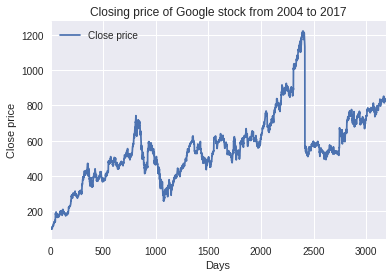

In [29]:
#visualizing data
data.Close.plot(label='Close price')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.title('Closing price of Google stock from 2004 to 2017')
plt.legend()

print data.shape

In [30]:
#reshaping x and y to make the input dimensions suitable for sklearn
X = (np.arange(1,3185))
X = X.reshape(3184,1)

y = data.Close
y = y.reshape(3184,1)

X_train = X[0:2800,:]
y_train = y[0:2800,:]

X_test = X[2800:,:]
y_test = y[2800:,:]

clf = LinearRegression()
print X_train.shape,y_train.shape

#training the model


(2800, 1) (2800, 1)


/home/satishj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [31]:
#training Linear Regression classifier
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
#predicting on test set
predicted = clf.predict(X_test)

print("Root mean squared error: %.2f"% np.sqrt(np.mean((predicted - y_test) ** 2)))

Root mean squared error: 60.89


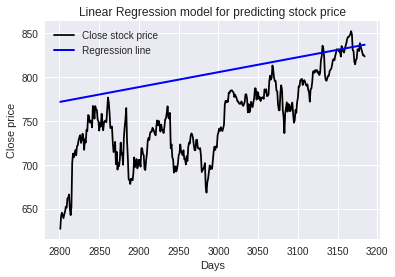

In [33]:
# Plot outputs
plt.plot(X_test,y_test,  color='black', label = 'Close stock price')

plt.plot(X_test, predicted, color='blue',linewidth=2,label = 'Regression line')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.legend(loc = 'upper left')
plt.title("Linear Regression model for predicting stock price")
plt.show()